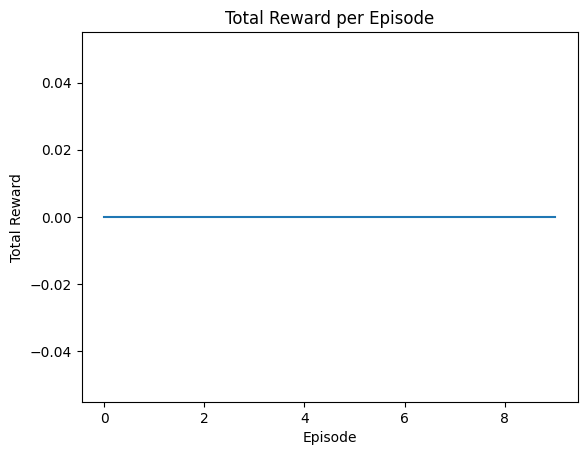

: 

In [16]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import numpy as np

# Initialize the environment
env = gym.make('FrozenLake-v1', desc=generate_random_map(size=8), is_slippery=True, render_mode='human')

# Initialize value policy and other parameters
num_states = env.observation_space.n
VP = np.zeros(num_states)
alpha = 0.5
gamma = 0.9
epsilon = 0.5

# Epsilon-greedy policy definition
def epsilon_greedy_policy(state, VP, epsilon=0.5):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(VP[state])  # Exploit

# Track the total reward (or value) per episode
total_rewards_per_episode = []

# Number of episodes
num_episodes = 10

for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    total_episode_reward = 0  # Track the total reward in this episode
    
    while not done:
        action = epsilon_greedy_policy(state, VP)
        next_state, reward, terminated, truncated, _ = env.step(action)

        done = terminated or truncated

        # TD(0) update for value function
        if done:
            VP[state] = reward
        else:
            VP[state] = VP[state] + alpha * (reward + gamma * VP[next_state] - VP[state])
        
        # Accumulate the reward for the episode
        total_episode_reward += reward

        # Move to the next state
        state = next_state
    
    # Append the total reward of this episode to the list
    total_rewards_per_episode.append(total_episode_reward)

# Plot total rewards per episode
plt.plot(range(num_episodes), total_rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

env.close()